In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
articles_dataset_root_path = 'data/'
articles = pd.read_csv(articles_dataset_root_path + 'preprocessed_articles.csv', sep = ';', index_col = [0])

In [41]:
articles

,title,content,date,author,region,zone
0,d’albert riunion anci regional decar,teram president gianguid d’albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"coronavirus, novit introdott dpcm 10 april 2020",sit minister dell’intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"coronavirus, nuov misur vend gener alimentar a...","pescar oggi, mercoled 15 aprile, president reg...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"regione, ecco guid formazion distanz iefp",pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all’iniz pd abruzz facebook,region “le scelt pd. l’ital l’abruzzo”: intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,"cop pir giornal telegram, salg 114 canal oscur",sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,"inchiest sanit umbra, chius indagini. l'ex gov...","chiusur dell'indagin assunzion sanità, destabi...",2020-05-04,La Repubblica,Lazio,Centre
24581,"coronavirus italia, 3691 denunc prim giorn fas 2","rom - aspett boom sanzion prim giorn fas due, ...",2020-05-05,La Repubblica,Lazio,Centre
24582,"coronavirus, medicina, denunc azione: ""tropp p...","ventiduemil medic pront entrar specialità, and...",2020-05-06,La Repubblica,Lazio,Centre


# Analysis based on arbitrary keywords

In [42]:
keywords = ['covid', 'coronavirus','covid 19']#, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']
keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]
articles_with_covid_keywords

,title,content,date,author,region,zone
0,d’albert riunion anci regional decar,teram president gianguid d’albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"coronavirus, novit introdott dpcm 10 april 2020",sit minister dell’intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"coronavirus, nuov misur vend gener alimentar a...","pescar oggi, mercoled 15 aprile, president reg...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"regione, ecco guid formazion distanz iefp",pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
5,"inps abruzzo: aggiorn dat indenn 600 euro, cig...",region l’inps abruzz fortement impegn difficil...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24575,coronavirus mondo: usa mort ogni 44 second april,"accus pompe cina""c numer prov fatt coronavirus...",2020-05-03,La Repubblica,Lazio,Centre
24576,"coronavirus, carcer arriv 1000 oper sanitar",mill nuov oper sanitar carcer italiane. e' pia...,2020-05-03,La Repubblica,Lazio,Centre
24581,"coronavirus italia, 3691 denunc prim giorn fas 2","rom - aspett boom sanzion prim giorn fas due, ...",2020-05-05,La Repubblica,Lazio,Centre
24582,"coronavirus, medicina, denunc azione: ""tropp p...","ventiduemil medic pront entrar specialità, and...",2020-05-06,La Repubblica,Lazio,Centre


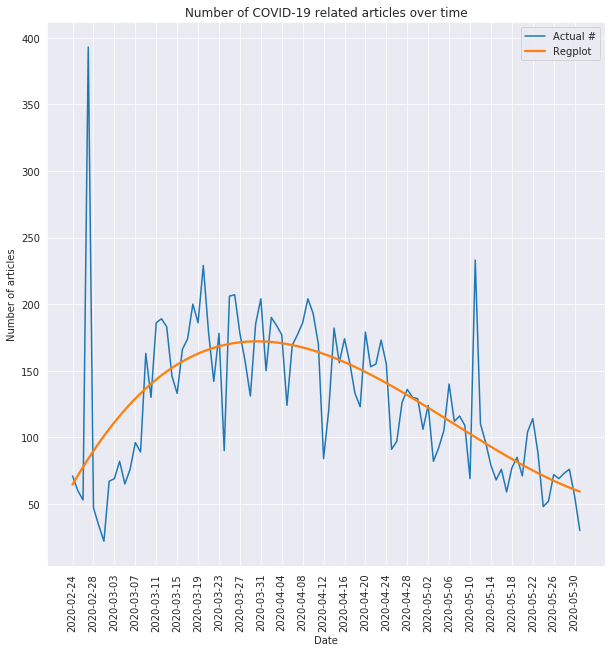

In [43]:
import matplotlib.ticker as plticker
import matplotlib
from datetime import datetime

sns.set_style("darkgrid")
keywords = ['covid', 'coronavirus','covid 19']#, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']

keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]

count_articles_dataset = articles_with_covid_keywords.groupby('date').count().iloc[:,0]
dates =count_articles_dataset.index

fig, ax = plt.subplots(figsize=(10, 10))    
sns.lineplot(dates, count_articles_dataset.values, ax = ax);
sns.regplot(range(len(dates)), count_articles_dataset.values, ax = ax, order = 3, scatter = False, ci = None);

ax.set_xticks(dates[::4])
ax.set_xticklabels(dates[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('Number of COVID-19 related articles over time')
plt.show(ax)

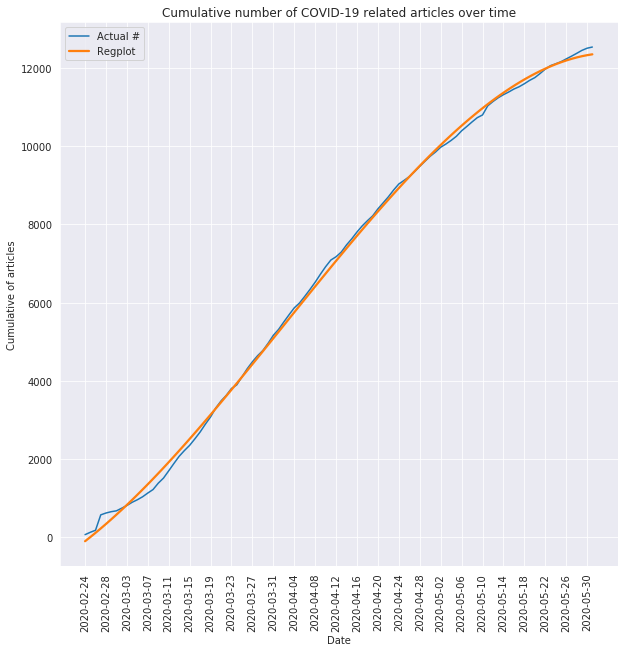

In [44]:

cumulative_cols = ['date', 'cumulative_num_articles']
cumulative = pd.DataFrame()

for i in range(len(count_articles_dataset.index)):
    date_tmp = count_articles_dataset.index[i]
    cumulative_sum_tmp = sum(count_articles_dataset.values[:i+1])
    cumulative = cumulative.append(pd.DataFrame(data = [[date_tmp, cumulative_sum_tmp]], columns = cumulative_cols, index = [len(cumulative.index)]))
    
    
fig, ax = plt.subplots(figsize=(10, 10))    
sns.lineplot(cumulative.date, cumulative.cumulative_num_articles, ax = ax);
sns.regplot(range(len(cumulative.date)), cumulative.cumulative_num_articles, ax = ax, order = 3, scatter = False, ci = None);

ax.set_xticks(cumulative.date[::4])
ax.set_xticklabels(cumulative.date[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Cumulative of articles')
plt.title('Cumulative number of COVID-19 related articles over time')
plt.show(ax)

    